## Processing Bilibili Video Data

1. The original data base is HyperSQL.
2. It would be much better to convert it to mongodb

In [1]:
# import jaydebeapi
# conn = jaydebeapi.connect("org.hsqldb.jdbcDriver", "jdbc:hsqldb:mem:.",["SA", ""], "/path/to/hsqldb.jar",)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

plt.style.use('ggplot')

In [3]:
class Cleaner:
    """ Data Cleaner """

    def __init__(self):
        self.raw = []
        self.data = []

    def hay(self,path):
        
        with open(path) as f:
            for line in f:
                self.raw.append(line)
    
    def dval(self, bgp=None,edp=None, seg=None):
        if bgp == None:
            bgp = 7
        if edp == None:
            edp = -1
        if seg == None:
            seg = 2
            
        arr = self.raw[bgp:edp:seg]
        data1 = []

        for elem in arr:
            data1.append( elem[38:-2] )
            
        for elem in data1:
            self.data.append( elem.split(",") )

        for i in range(len(self.data)):
            for j in range( len(self.data[i]) ):
                self.data[i][j] = int( (self.data)[i][j] )
        
        

In [4]:
file="../Bilibi-Video-2018-2-28/124.db.log"

In [5]:
dt = Cleaner()
dt.raw

[]

In [6]:
dt.hay(file)
dt.dval()

In [7]:
videos=dt.data

In [8]:
df = pd.DataFrame(videos, columns=['aid', 'uid', 'time','duration','state','view','danmaku','coin','favorite','share','reply','like'])

In [9]:
df

,aid,uid,time,duration,state,view,danmaku,coin,favorite,share,reply,like
0,20081986,94742590,1519817447,1186,162817,44,0,0,3,1,1,1
1,20180261,98610101,1519817375,475,97280,473,21,7,3,0,33,11
2,20180038,286920401,1519816524,103,97281,21,1,0,0,0,1,3
3,20180089,96799370,1519816444,113,97281,116,1,4,2,0,6,7
4,20188229,10330740,1519816417,36,97280,3609,22,16,15,3,170,130
5,20179573,281337957,1519816388,221,97280,12,0,0,0,0,1,1
6,20180027,205631797,1519816311,153,97281,177,3,10,2,0,12,4
7,20179366,246980638,1519816114,767,97281,1,0,0,0,0,0,0
8,20179641,182722309,1519816019,200,97281,1,0,0,0,0,0,0
9,20179565,241272994,1519815962,220,97280,1,0,0,0,0,0,0


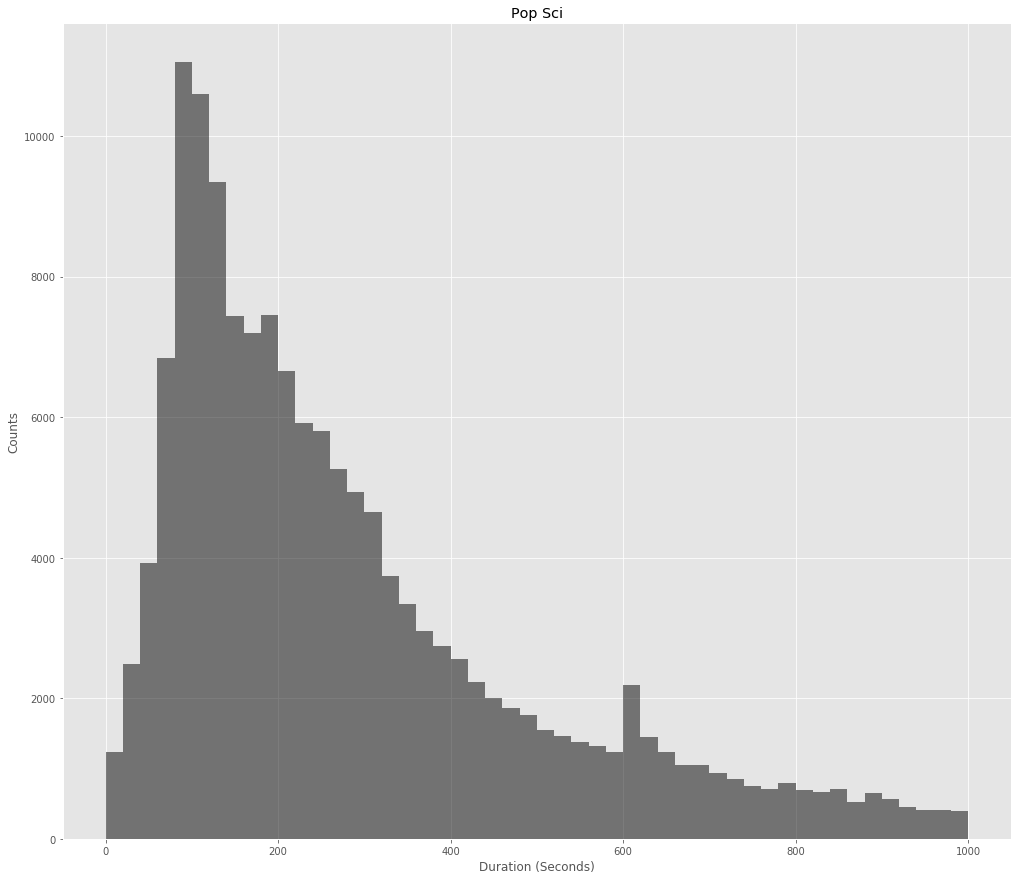

In [10]:
plt.figure(figsize=(17,15))
df['duration'].hist(color='k', alpha=0.5, bins=50, range=[0, 1000] )
plt.xlabel('Duration (Seconds)')
plt.ylabel('Counts')
plt.title('Pop Sci')
plt.show()

In [25]:
df[( df['duration'] < 610) & ( df['duration'] > 590)]

,aid,uid,time,duration,state,view,danmaku,coin,favorite,share,reply,like
203,20164856,4558893,1519787097,600,97408,16,0,0,0,0,0,0
283,20150680,3465557,1519740384,594,97408,535,18,22,35,0,20,49
538,20145016,1392459,1519748458,604,97408,127,2,0,4,0,1,4
575,20127988,77877771,1519713846,604,97408,754,5,3,6,0,2,11
581,20127311,6654638,1519712726,608,162817,899,92,229,159,46,157,119
620,20122685,221648,1519703760,603,97408,27621,505,72,277,40,135,681
642,20121528,183379689,1519700344,598,97281,10,0,0,0,0,0,0
686,20116064,106584480,1519686144,599,97408,24,0,0,0,0,0,0
716,20111786,19475610,1519677771,599,97408,15,0,0,0,0,0,0
762,20106098,14149726,1519667818,601,97408,898,18,24,45,1,22,36


In [76]:
popscihist = np.histogram( df['duration'].values, bins=np.arange(0,df['duration'].values.max(),10), density=True )

In [77]:
datax = popscihist[1]
datay = popscihist[0]

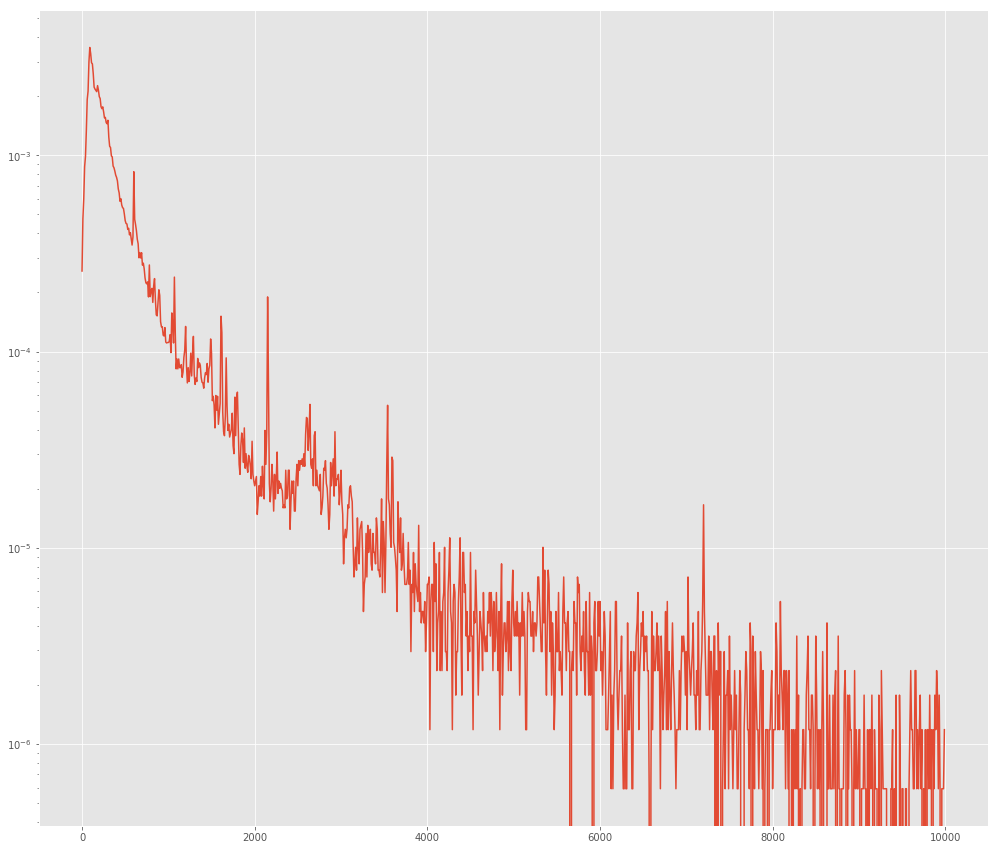

In [85]:
popscihist_edp = 1000

plt.figure(figsize=(17,15) )
plt.semilogy(datax[:popscihist_edp],datay[:popscihist_edp])
plt.show()

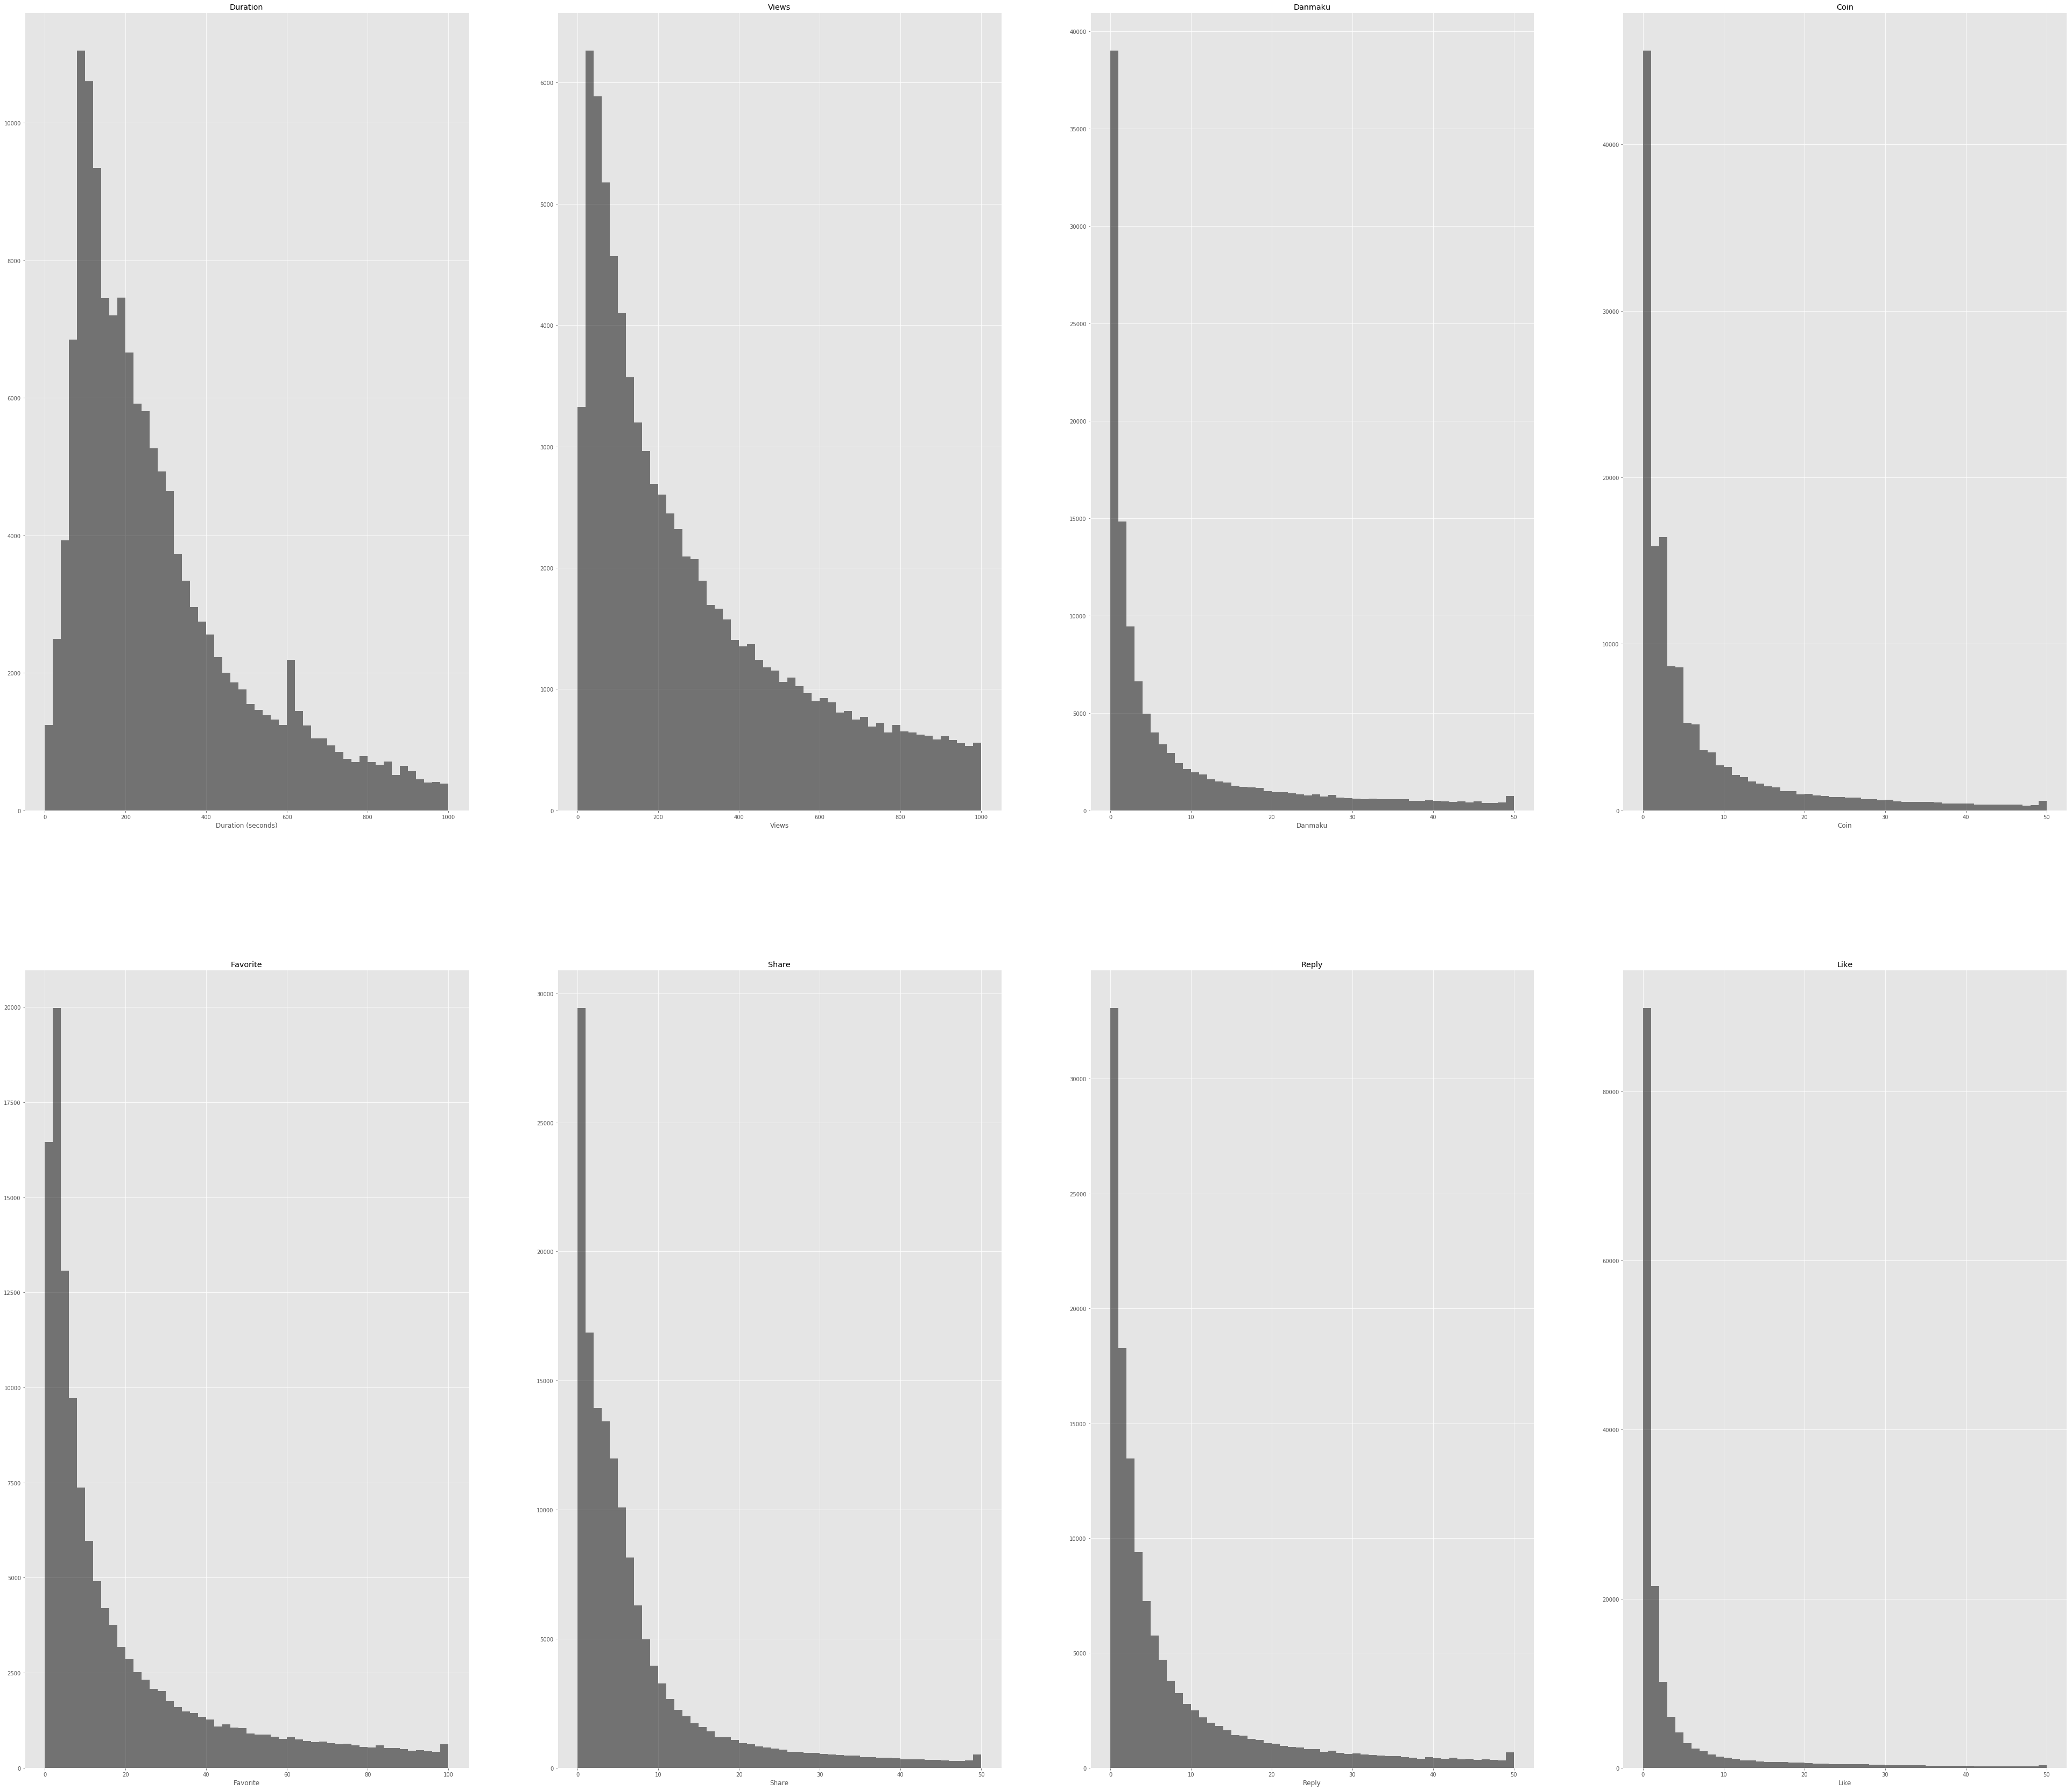

In [11]:
hist_fig, hist_ax = plt.subplots(nrows=2, ncols=4,figsize=(17*4, 15*4))

hist_ax[0,0].hist( df['duration'], color='k', alpha=0.5, bins=50, range=[0, 1000] )
hist_ax[0,0].set_title('Duration')
hist_ax[0,0].set_xlabel('Duration (seconds)')

hist_ax[0,1].hist( df['view'], color='k', alpha=0.5, bins=50, range=[0, 1000] )
hist_ax[0,1].set_title('Views')
hist_ax[0,1].set_xlabel('Views')

hist_ax[0,2].hist( df['danmaku'], color='k', alpha=0.5, bins=50, range=[0, 50] )
hist_ax[0,2].set_title('Danmaku')
hist_ax[0,2].set_xlabel('Danmaku')

hist_ax[0,3].hist( df['coin'], color='k', alpha=0.5, bins=50, range=[0, 50] )
hist_ax[0,3].set_title('Coin')
hist_ax[0,3].set_xlabel('Coin')

hist_ax[1,0].hist( df['favorite'], color='k', alpha=0.5, bins=50, range=[0, 100] )
hist_ax[1,0].set_title('Favorite')
hist_ax[1,0].set_xlabel('Favorite')

hist_ax[1,1].hist( df['share'], color='k', alpha=0.5, bins=50, range=[0, 50] )
hist_ax[1,1].set_title('Share')
hist_ax[1,1].set_xlabel('Share')

hist_ax[1,2].hist( df['reply'], color='k', alpha=0.5, bins=50, range=[0, 50] )
hist_ax[1,2].set_title('Reply')
hist_ax[1,2].set_xlabel('Reply')


hist_ax[1,3].hist( df['like'], color='k', alpha=0.5, bins=50, range=[0, 0] )
hist_ax[1,3].set_title('Like')
hist_ax[1,3].set_xlabel('Like')




# df['duration'].hist(ax=hist_ax[0,0]); hist_ax[0,0].set_title('Duration'); hist_ax[0,0].set_xlim([0,10000]);

# df[ ['duration','view','danmaku','coin','favorite','share','reply','like']].hist(color='k', alpha=0.5, bins=50, range=[0, 1000])
plt.show()

In [32]:
ra = [
    [0, 1000],
    [0, 1000],
    [0, 50],
    [0, 50],
    [0, 100],
    [0, 50],
    [0, 50],
    [0, 50]
]

df_sm = df[( df['duration'] < 5000 )&( df['view'] < 5000 ) &( df['danmaku'] < 1000 ) &( df['coin'] < 100 ) & ( df['favorite'] < 200 ) &( df['share'] < 100 ) &( df['reply'] < 100 ) &( df['like'] < 100 )][['duration','view','danmaku','coin','favorite','share','reply','like']]

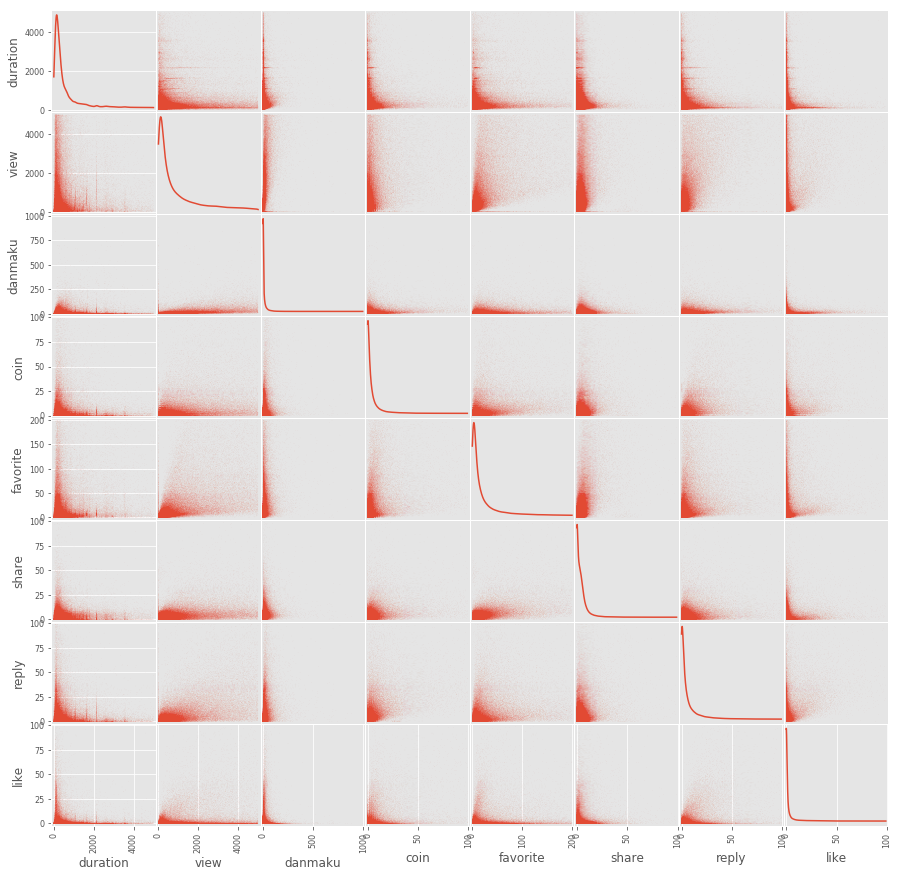

In [33]:
sm = scatter_matrix(
    df_sm,
    figsize  = [15, 15],
    marker   = ".",
    s        = 0.2,
    diagonal = "kde"
)


In [86]:
for ax in sm.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0)
    
plt.show()